# Exploración  y Preprocesamiento de datos

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Valores faltantes por columna:
Valores faltantes:

Estadísticas básicas del conjunto de datos:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.0000

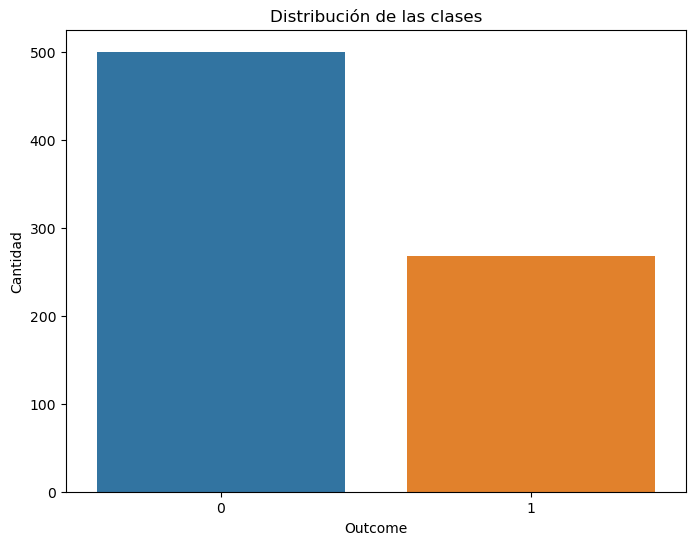


Dimensiones de los conjuntos de entrenamiento y prueba:
Conjunto de entrenamiento: (614, 8) (614,)
Conjunto de prueba: (154, 8) (154,)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
df = pd.read_csv("diabetes.csv")

# Explorar el conjunto de datos
print("Información del conjunto de datos:")
print(df.info())

# Manejar valores faltantes
print("\nValores faltantes por columna:")
# Seleccionar las columnas de interés
columnas_de_interes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Encontrar los valores iguales a cero en esas columnas
valores_faltantes = df[df[columnas_de_interes].eq(0).any(axis=1)]

# Imprimir los valores faltantes
print("Valores faltantes:")



# Exploración estadística básica
print("\nEstadísticas básicas del conjunto de datos:")
print(df.describe())

# Evaluar el balance del conjunto de datos
print("\nBalance de clases:")
print(df['Outcome'].value_counts())

# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Outcome')
plt.ylabel('Cantidad')
plt.show()

# Separar el conjunto de datos en entrenamiento (80%) y prueba (20%)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("\nDimensiones de los conjuntos de entrenamiento y prueba:")
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)



# Regresión logística

In [10]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de entrenamiento: 0.7703583061889251
Precisión en el conjunto de prueba: 0.7467532467532467


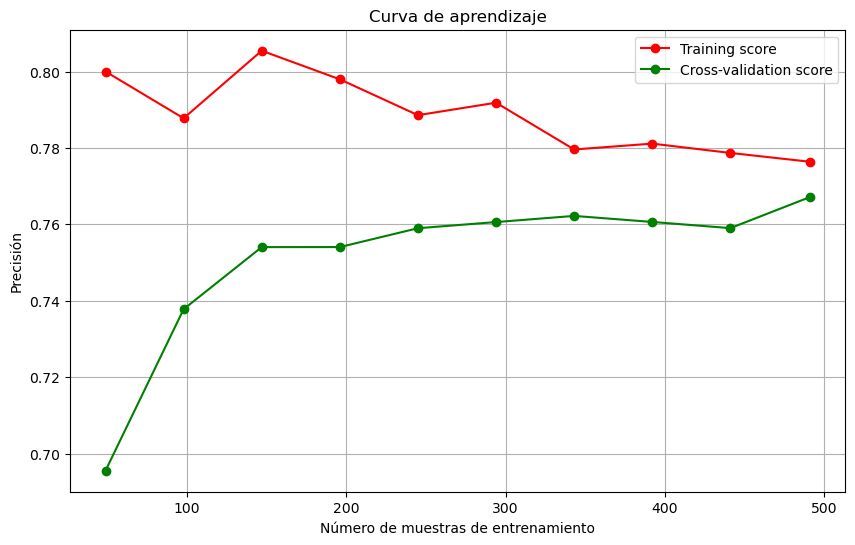

In [11]:
from sklearn.model_selection import learning_curve

# Función para trazar curva de aprendizaje
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
     
    plt.title("Curva de aprendizaje")
    plt.xlabel("Número de muestras de entrenamiento")
    plt.ylabel("Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Llamar a la función para trazar la curva de aprendizaje
plot_learning_curve(model, X_train, y_train)
